<a href="https://colab.research.google.com/github/MariiaKalinina/BM/blob/main/Pore_pressure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NEW

To calculate the pore pressure for each layer in a basin, we need to use the given pore pressure equation and the initial data provided. The general form of the pore pressure equation is:

$
\left( 1 - \frac{\varphi}{C} \right) \frac{\partial u}{\partial t} - \nabla \left( \frac{k}{\mu} \right) \cdot \nabla u = \left( 1 - \frac{\varphi}{C} \right) \frac{\partial u_l}{\partial t}
$

Given that this is a partial differential equation (PDE), solving it analytically can be quite complex. Instead, we will make some simplifying assumptions and perform numerical calculations for each layer.

*   subsection: Simplifying Assumptions

subsection*{Steady-State Condition}
Assume steady-state conditions where $\frac{\partial u}{\partial t} = 0$ and $\frac{\partial u_l}{\partial t} = 0$. This simplifies the equation to:
$
- \nabla \left( \frac{k}{\mu} \right) \cdot \nabla u = 0]
$

*   subsection: One-Dimensional Flow
Assume one-dimensional flow along the vertical direction $z$. Under these assumptions, the simplified PDE becomes:
$
- \frac{d}{dz} \left( \frac{k}{\mu} \frac{du}{dz} \right) = 0
$

Integrating this equation gives:
$
\frac{k}{\mu} \frac{du}{dz} = \text{constant}
$

Assuming constant $\frac{k}{\mu}$ within each layer, we get:
$
u(z) = u_0 + \frac{\mu}{k} q z
$

Where $q$ is the fluid flux per unit area and $u_0$ is the pressure at the top of the layer.

**section: Calculation Steps**

*   subsection: Calculate Hydrostatic Pressure

$
P_{\text{hydro}}(z) = \rho_{\text{fluid}} g z
$

subsection*{Calculate Lithostatic Pressure}
$
P_{\text{litho}}(z) = \int_0^z \rho_{\text{rock}}(z') g dz'
$

subsection*{Calculate Overburden Pressure}
$
P_{\text{overburden}}(z) = P_{\text{litho}}(z) - P_{\text{hydro}}(z)
$

subsection*{Solve for Pore Pressure}
Use the relation between overburden pressure and pore pressure:
$
u(z) = P_{\text{overburden}}(z) - \sigma_v(z)
$
Where $\sigma_v(z)$ is the effective vertical stress.



## Effective stress = f(effective poroisty, compaction parametr)

In [76]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [77]:
# Functions for pressure calculations
def hydrostatic_pressure_single(depth, sea_level=0, sediment_surface=0, water_depth=0, rho_water=1040):
    """
    Calculate hydrostatic pressure at a given depth.
    Parameters:
    - depth: The depth at which to calculate hydrostatic pressure (m)
    - sea_level: Elevation of the sea level (m, reference point)
    - sediment_surface: Depth of sediment surface (m)
    - water_depth: Depth of water column above the sediment (m)
    - rho_water: Density of water (kg/m³)
    Returns:
    - Hydrostatic pressure at the given depth (MPa)
    """
    g = 9.81  # Acceleration due to gravity (m/s²)
    pressure = quad(lambda z: rho_water * g, sea_level, depth)[0]
    # Convert pressure to MPa and return
    return pressure / 1e6

def calculate_lithostatic_pressure_single(thickness, rock_density, porosity, rho_water=1000, g=9.81):
    """
    Calculate lithostatic pressure for a single layer.
    Parameters:
        thickness (float): Thickness of the layer (m).
        rock_density (float): Rock density (kg/m³).
        porosity (float): Porosity (fraction).
        rho_water (float): Fluid density (kg/m³). Default is 1000 kg/m³.
        g (float): Gravitational acceleration (m/s²). Default is 9.81 m/s².
    Returns:
        float: Lithostatic pressure for the given layer (MPa).
    """
    return (g * thickness * (rock_density * (1 - porosity) + rho_water * porosity)) / 1e6

def arty_model(phi, phi0, k):
    if phi0 <= 0 or k <= 0:
        raise ValueError("phi0 and k must be positive values.")
    return - (1 / k) * np.log(phi / phi0)

Calculating pressures for layer: 0
Calculating pressures for layer: 1
Calculating pressures for layer: 2
Calculating pressures for layer: 3
Calculating pressures for layer: 4
Calculating pressures for layer: 5
14.32284715385857
Layer 0: Rock Density = 2700, Porosity = 0.4173, Hydrostatic Pressure = 10.21 MPa, Pore Pressure = 14.32 MPa, Lithostatic Pressure = 19.71 MPa
26.09250118298546
Layer 1: Rock Density = 2720, Porosity = 0.2688, Hydrostatic Pressure = 20.42 MPa, Pore Pressure = 26.09 MPa, Lithostatic Pressure = 41.96 MPa
42.02218155042001
Layer 2: Rock Density = 2970, Porosity = 0.01, Hydrostatic Pressure = 20.44 MPa, Pore Pressure = 42.02 MPa, Lithostatic Pressure = 42.02 MPa
57.25083752883646
Layer 3: Rock Density = 2720, Porosity = 0.3492, Hydrostatic Pressure = 30.80 MPa, Pore Pressure = 57.25 MPa, Lithostatic Pressure = 63.29 MPa
68.75426601708998
Layer 4: Rock Density = 2720, Porosity = 0.2575, Hydrostatic Pressure = 41.24 MPa, Pore Pressure = 68.75 MPa, Lithostatic Pressure

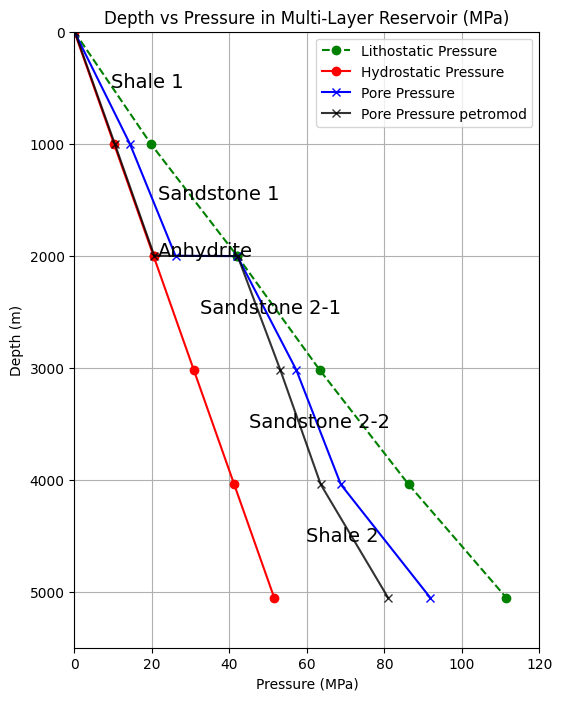

In [113]:
# Constants
g = 9.81  # Acceleration due to gravity (m/s²)

layer_thicknesses = np.array([1001, 1000, 2, 1016, 1023, 1010])  # Layer thicknesses in meters
num_layers = len(layer_thicknesses)  # Number of layers based on the thicknesses
depths = np.cumsum(layer_thicknesses)  # Depths based on cumulative sum of thicknesses

# Add surface depth (0m) for the plot to start from the surface
depths = np.insert(depths, 0, 0)
layer_names = ['Shale 1', 'Sandstone 1', 'Anhydrite', 'Sandstone 2-1', 'Sandstone 2-2', 'Shale 2']
rock_densities = np.array([2700, 2720, 2970, 2720, 2720, 2720])  # Rock densities for each layer
fluid_density = 1040  # Fluid density (kg/m³)

# Example layer parameters:
parameters = {
    'phi': np.array([0.4173, 0.2688, 0.01, 0.3492, 0.2575, 0.1064]),  # Porosity
    'phi0': np.array([0.70, 0.41, 0.01, 0.41, 0.41, 0.70]),
    'k': np.array([np.power(10.0, -2.26), np.power(10.0, 3.16), np.power(10.0, -16), np.power(10.0, 3.86), np.power(10.0, 3.06), np.power(10.0, -6.3)]),  # Permeability (m^2)
    'mu': np.array([1e-3, 1e-3, 1e-3, 1e-3, 1e-3, 1e-3]),  # Dynamic viscosity (Pa·s)
    'kp': np.array([0.096, 0.0266, 10*1e-8, 0.0266, 0.0266, 0.096]),  # compaction parametr (1/MPa)
     'C': np.array([0.03563, 0.00666, 1, 0.00981, 0.00627, 0.0055]),  # Compressibility (1/GPa)
}

P_l = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic (lithostatic potential)
lith_pres = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic
hydro_pres = np.zeros(num_layers)  # Pressure due to lithostatic - hydrostatic
lith_final = 0  # Start with zero lithostatic pressure at the surface

# Depths excluding the surface depth (0m)
depths_new = depths[1:]

# Set constants for water depth calculation
SEA_LEVEL = 0
SEDIMENT_SURFACE = 0
if SEDIMENT_SURFACE >= 0:
    WATER_DEPTH = SEDIMENT_SURFACE
else:
    WATER_DEPTH = SEA_LEVEL

for i in range(num_layers):
    print('Calculating pressures for layer:', i)
    # Calculate hydrostatic pressure for the current layer
    hydro_pres[i] = hydrostatic_pressure_single(
        depths_new[i],
        sea_level=SEA_LEVEL,
        sediment_surface=SEDIMENT_SURFACE,
        water_depth=WATER_DEPTH,
        rho_water=fluid_density
    )

    # Calculate lithostatic pressure for the current layer
    lith_pres[i] = calculate_lithostatic_pressure_single(
        layer_thicknesses[i],
        rock_densities[i],
        parameters['phi'][i],
        rho_water=fluid_density,
        g=g
    )
    lith_final += lith_pres[i]
    lith_pres[i] = lith_final

    P_l[i] = lith_pres[i] - hydro_pres[i]

# Prepend a 0 to the pressures to align with the surface depth (0m)
lithostatic_pressure = np.insert(lith_pres, 0, 0)
hydrostatic_pressure = np.insert(hydro_pres, 0, 0)


effective_stress = np.zeros(num_layers)
pore_pres = np.zeros(num_layers)


for i in range(num_layers):

    # Calculate hydrostatic pressure for the current layer
    effective_stress[i] = arty_model(parameters['phi'][i],
                                    parameters['phi0'][i],
                                    parameters['kp'][i])

    pore_pres[i] = lith_pres[i] - effective_stress[i]


    print(pore_pres[i])
    print(f"Layer {i}: Rock Density = {rock_densities[i]}, Porosity = {parameters['phi'][i]}, "
    f"Hydrostatic Pressure = {hydro_pres[i]:.2f} MPa, Pore Pressure = {pore_pres[i]:.2f} MPa, Lithostatic Pressure = {lith_pres[i]:.2f} MPa")

pore_pressure_petromod= np.array([
    0.1, 10.42, 20.62, 42.12, 53.13, 63.57, 80.92
])

pore_pressure = np.insert(pore_pres, 0, 0)


plt.figure(figsize=(6, 8))
plt.plot(lithostatic_pressure, depths, linestyle='--', color='g', label='Lithostatic Pressure', marker='o')
plt.plot(hydrostatic_pressure, depths, linestyle='-', color='r', label='Hydrostatic Pressure', marker='o')
plt.plot(pore_pressure , depths, linestyle='-', color='b', label='Pore Pressure', marker='x')
plt.plot(pore_pressure_petromod, depths, linestyle='-', color='black', marker='x', label='Pore Pressure petromod', alpha=0.8)
plt.xlabel('Pressure (MPa)')
plt.ylabel('Depth (m)')
plt.title('Depth vs Pressure in Multi-Layer Reservoir (MPa)')
plt.xlim(0, 120)
plt.ylim(0, 5500)
plt.gca().invert_yaxis()  # Invert y-axis to show increasing depth downward


top_depths = np.insert(depths[:-1], 0, 0)  # Top depths of each layer
mid_depths = (top_depths + depths)/2   # Midpoint depths of each layer
for i, (name, depth) in enumerate(zip(layer_names, mid_depths[1:])):  # Skip first depth (surface)
    plt.text(P_l[i], depth, name, ha='left', va='baseline', fontsize=14, color='black')
plt.grid(True)
plt.legend(loc='best')
plt.show()